EDA after initial training of the model, for competition Spaceship Titanic

https://www.kaggle.com/competitions/spaceship-titanic/overview

First step of doing EDA, is creating automatic ydata report.

In [1]:
!pip install --quiet ydata_profiling

Second step of doing EDA will be checking column values based on steps mentioned here:

  https://shopify.engineering/conducting-exploratory-data-analysis

1. Check For Missing Data
2. Provide Basic Descriptions of Your Sample and Features
3. Identify The Shape of Your Data
4. Identify Significant Correlations
5. Spot Outliers in the Dataset




In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [3]:
is_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', False)

In [4]:
if is_kaggle:
  # Input data files are available in the read-only "../input/" directory
  # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

  for dirname, _, filenames in os.walk('/kaggle/input'):
      for filename in filenames:
          print(os.path.join(dirname, filename))

  # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
  # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
base_path =  '/kaggle/input/spaceship-titanic' if is_kaggle else '/content/'

In [6]:
train_path = os.path.join(base_path, 'train.csv')
test_path = os.path.join(base_path, 'test.csv')

In [7]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Reread the original dataframe, because it might be used later.
df_original = pd.read_csv(train_path)

In [8]:
def parse_data_based_on_rules(df):
  df[["CabinDeck", "CabinNum", "CabinSide"]] = df["Cabin"].str.split("/", expand=True)
  df[['PassengerGroup', 'GroupMember']] = df['PassengerId'].str.split('_', expand=True)

In [9]:
parse_data_based_on_rules(df)

# **First step: create a Y-data automatic report**

In [10]:
def save_report(df, title, filename):
  profile = ProfileReport(df, title=title)
  profile.to_file(filename)

In [11]:
#save_report(df_original, "EDA Report - Spaceship Titanic", "kaggle_spaceship_titanic_01_original_data.html")

In [12]:
#save_report(df, "EDA Report - Spaceship Titanic", "kaggle_spaceship_titanic_02_parsed_columns.html")

# **Second step: create a Y-data automatic report**

**1.) Check For Missing Data**

In [13]:
null_counts = df_original.isnull().sum()

*Only Passenger id and Target value are not null.*

In [14]:
no_null_columns = null_counts[null_counts == 0]
no_null_columns

,0
PassengerId,0
Transported,0


In [15]:
columns_with_null = null_counts[null_counts > 0].sort_values(ascending=False)
columns_with_null

,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


*While most columns are null, count of null values is in range:   2% to 2.5%*

Min null count:

In [16]:
columns_with_null.min(),  columns_with_null.min() /len(df_original)

(179, 0.020591280340503854)

Max null count:

In [17]:
columns_with_null.max(), columns_with_null.max() / len(df_original)

(217, 0.02496261359714713)

In [18]:
columns_with_null

,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


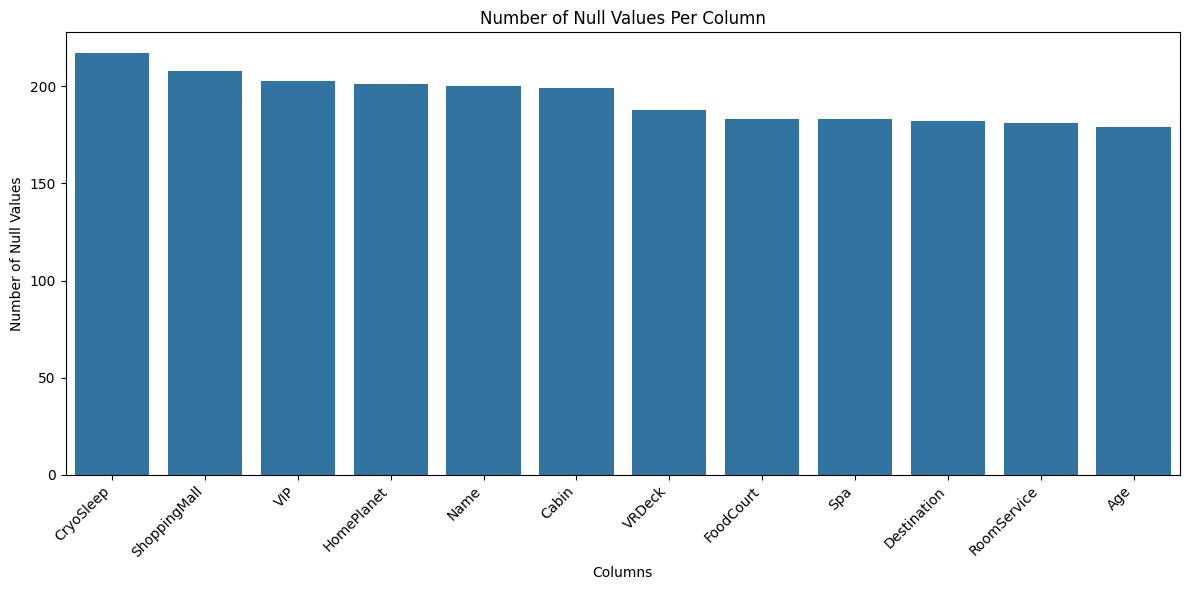

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=columns_with_null.index, y=columns_with_null.values,)
plt.title('Number of Null Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Almost all column contain some null values,
min and max values for null count are similar,
so there is possibility that some null values are correlated, that they happen at the same time.*

In [20]:
rows_with_multiple_nulls = df_original[df_original.isnull().sum(axis=1) >= 2]
rows_with_multiple_nulls

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
251,0278_01,Earth,False,NaN,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,888.0,NaN,Judya Beachez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8623,9197_04,Europa,False,C/308/P,55 Cancri e,30.0,False,1569.0,NaN,0.0,NaN,2252.0,Phecca Platch,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True


In [21]:
nulls = rows_with_multiple_nulls.apply(lambda row: row.index[row.isnull()].tolist(), axis=1)
nulls


,0
59,"[HomePlanet, ShoppingMall]"
111,"[CryoSleep, VRDeck]"
181,"[Age, ShoppingMall]"
186,"[HomePlanet, ShoppingMall]"
251,"[Cabin, VRDeck]"
...,...
8613,"[HomePlanet, Name]"
8623,"[FoodCourt, Spa]"
8664,"[CryoSleep, Name]"
8666,"[HomePlanet, VIP]"


In [22]:
nulls.describe()

,0
count,220
unique,79
top,"[CryoSleep, Name]"
freq,9


In [23]:
nulls.value_counts(ascending=False)

,count
"[CryoSleep, Name]",9
"[CryoSleep, Cabin]",6
"[CryoSleep, VRDeck]",6
"[ShoppingMall, VRDeck]",6
"[HomePlanet, RoomService]",6
...,...
"[HomePlanet, Age]",1
"[Age, VRDeck, Name]",1
"[HomePlanet, Age, VRDeck]",1
"[Cabin, Name]",1


In [24]:
null_corr = df_original.isnull().astype(int).corr(method='pearson')
#  ~np.eye(null_corr.shape[0], dtype=bool), is a way to create inverted diagonal matrix(1 are diagonals, 0 is the rest)
max_missing_corr = null_corr.where(~np.eye(null_corr.shape[0], dtype=bool)).abs().max().max()
max_missing_corr

0.024627354751187294

*Largest absolute correlation found is 0.024627, since this is less than 0.1, this means to correlation is present.*

**2.) Provide Basic Descriptions of Your Sample and Features**

Find which types are features conceptually.

Article mentions *Continuous*, *Discrete* and *Categorical* features.


Here features will be classified into one of 4:

1. Continuous
- Numeric, real‑valued, can take infinitely many values.
- Examples: revenue, temperature, GMV.
2. Discrete
- Numeric, countable values (0, 1, 2, 3…).
- Examples: number of sessions, number of orders.
3. Categorical – Nominal
- Categories with no inherent order.
- Examples: country, plan type, color.
4. Categorical – Ordinal
- Categories with a meaningful order, but not numeric distance.
- Examples: satisfaction level, education level.



Special cases like: Binary variables, Date/time features, Text features and Identifiers will be converted into one of these 4 gropus or dropped from features and mentioned as such.

In [25]:
continous_vars, discrete_vars, cat_nominal_vars, car_ordinal_vars = set(), set(), set(), set()

In [26]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


1.) EDA of numeric values.

In [27]:
numeric_df = df_original.select_dtypes(include=['number'])
numeric_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [28]:
df_original.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [29]:
a = df_original['Age'].unique()
a.sort()

In [30]:
a, len(a)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., nan]),
 81)

Age will be treated as discrete variable, since it is countable value and is displayed as integer here.

Other values will be treated as, since they are monetary values of money spend, so they can vary substantially from person to person.

In [31]:
discrete_vars.add('Age')

In [32]:
continous_vars.update(['RoomService','FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck'])

In [33]:
continous_vars

{'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck'}

In [34]:
discrete_vars

{'Age'}

2.) EDA of object values

In [35]:
non_numeric_columns = df_original.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')

First categorical values that are not combined identifies:    (PassengerId, Cabin, Name) and target value Transported .


In [36]:
df_original["HomePlanet"].unique(), df_original["HomePlanet"].nunique()

(array(['Europa', 'Earth', 'Mars', nan], dtype=object), 3)

In [37]:
df_original["Destination"].unique(), df_original["Destination"].nunique()

(array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object), 3)

In [38]:
df_original["CryoSleep"].unique(), df_original["CryoSleep"].nunique()

(array([False, True, nan], dtype=object), 2)

In [39]:
df_original["VIP"].unique(), df_original["VIP"].nunique()

(array([False, True, nan], dtype=object), 2)

In [40]:
cat_nominal_vars.update(['HomePlanet','Destination', 'CryoSleep', 'VIP'])

In [41]:
cat_nominal_vars

{'CryoSleep', 'Destination', 'HomePlanet', 'VIP'}

Now processs the combined values

Values that are identifiers combined from values are
  - Passenger id is in form: gggg_pp, where gggg is group, pp is member of group
  - Cabin, is in form: ( deck/num/side)

Each PassengerId is unique.

In [42]:
df_original["PassengerId"].nunique()

8693

In [43]:
df_original["PassengerId"].head()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


Number of Cabins is roughly 2/3 of all records.

In [44]:
df_original["Cabin"].nunique()

6560

In [45]:
df_original["Cabin"].head()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


Names are almost all unique, a lot of names, do not seem to be related to real names. For now columns will be ignored.

In [46]:
df_original["Name"].nunique(), len(df_original)

(8473, 8693)

In [47]:
df_original["Name"]

,Name
0,Maham Ofracculy
1,Juanna Vines
2,Altark Susent
3,Solam Susent
4,Willy Santantines
...,...
8688,Gravior Noxnuther
8689,Kurta Mondalley
8690,Fayey Connon
8691,Celeon Hontichre


Values obtained from generated values

In [48]:
df["CabinDeck"].unique(), df["CabinDeck"].nunique()

(array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object), 8)

In [49]:
df["CabinSide"].unique(), df["CabinSide"].nunique()

(array(['P', 'S', nan], dtype=object), 2)

In [50]:
df["GroupMember"].unique(), df["GroupMember"].nunique()

(array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object), 8)

In [51]:
cat_nominal_vars.update(['CabinDeck','CabinSide', 'GroupMember'])
cat_nominal_vars

{'CabinDeck',
 'CabinSide',
 'CryoSleep',
 'Destination',
 'GroupMember',
 'HomePlanet',
 'VIP'}

These are discrete values but seem to be identifiers.

While they were used in training first dataset as numeric values,
they should probably be ignored since they are identifies.
For now they will be ignored.

In [52]:
df["CabinNum"].unique(), df["CabinNum"].nunique()

(array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object), 1817)

In [53]:
df["PassengerGroup"].unique(), df["PassengerGroup"].nunique()

(array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object),
 6217)

**Final classification of values:**

Continuous:   

In [54]:
continous_vars

{'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck'}

Discrete:  

In [55]:
discrete_vars

{'Age'}

Nominal Categorical:

In [56]:
cat_nominal_vars

{'CabinDeck',
 'CabinSide',
 'CryoSleep',
 'Destination',
 'GroupMember',
 'HomePlanet',
 'VIP'}

Ordinal Categorical:

In [57]:
car_ordinal_vars

set()

Target value Transported is Nominal Categorical, because it is binary.

In [58]:
df["Transported"].unique(), df["Transported"].nunique()

(array([False,  True]), 2)

**3.) Identify The Shape of Your Data**

Target value is distributed almost evenly.

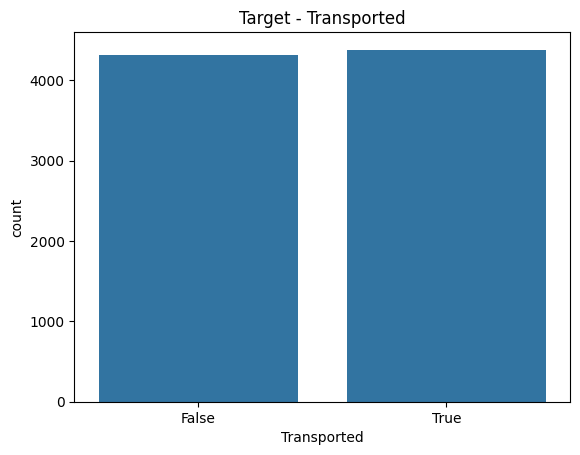

In [59]:
plt.figure()
sns.countplot(x=df["Transported"])
plt.title("Target - Transported")
plt.show()

All numerical values related to money follow similar distribution.

Vizualization of distribution is done for values larger than 0, because most common value is always 0.

In [60]:
print(continous_vars)

{'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService', 'VRDeck'}


In [61]:
def show_money_data_distribution(col):
  summary = pd.DataFrame({
      "Status": ["Null", "0", "Larger than 0"],
      "Count": [
          df[col].isnull().sum(),
          (df[col] == 0).sum(),
          (df[col] > 0).sum()
      ]
  })

  fig, axs = plt.subplots(3, 1, figsize=(10, 10))
  fig.tight_layout(pad=4.0)

  sns.barplot(data=summary, x="Status", y="Count",  ax=axs[0])
  axs[0].set_title(f"'{col}: Null vs Zero vs Non‑Zero Counts for'")

  sns.violinplot(y=df[df[col] > 0][col],  ax=axs[1])
  axs[1].set_title(f"'{col}: Violin Plot of values larger than 0")

  sns.violinplot(y=df[df[col] > 0][col],  ax=axs[2])
  axs[2].set_title(f"'{col}: Violin Plot logarithmically scaled of values larger than 0")
  plt.yscale("log")

  plt.show()

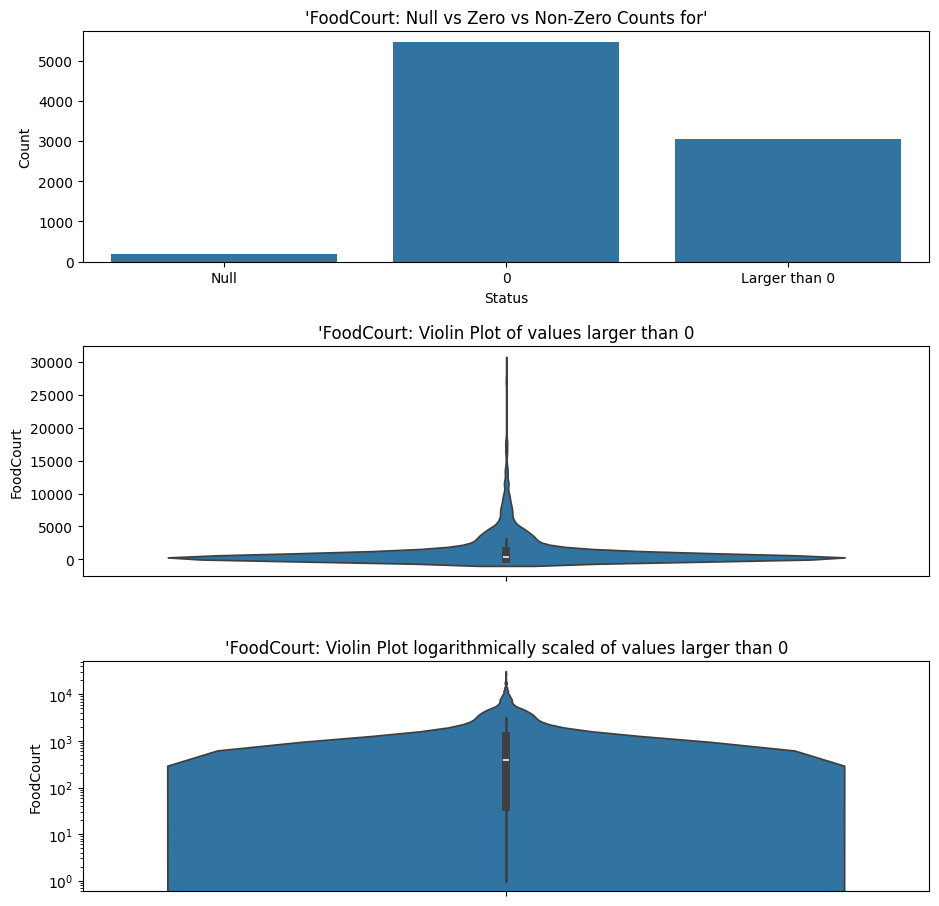

In [62]:
show_money_data_distribution('FoodCourt')

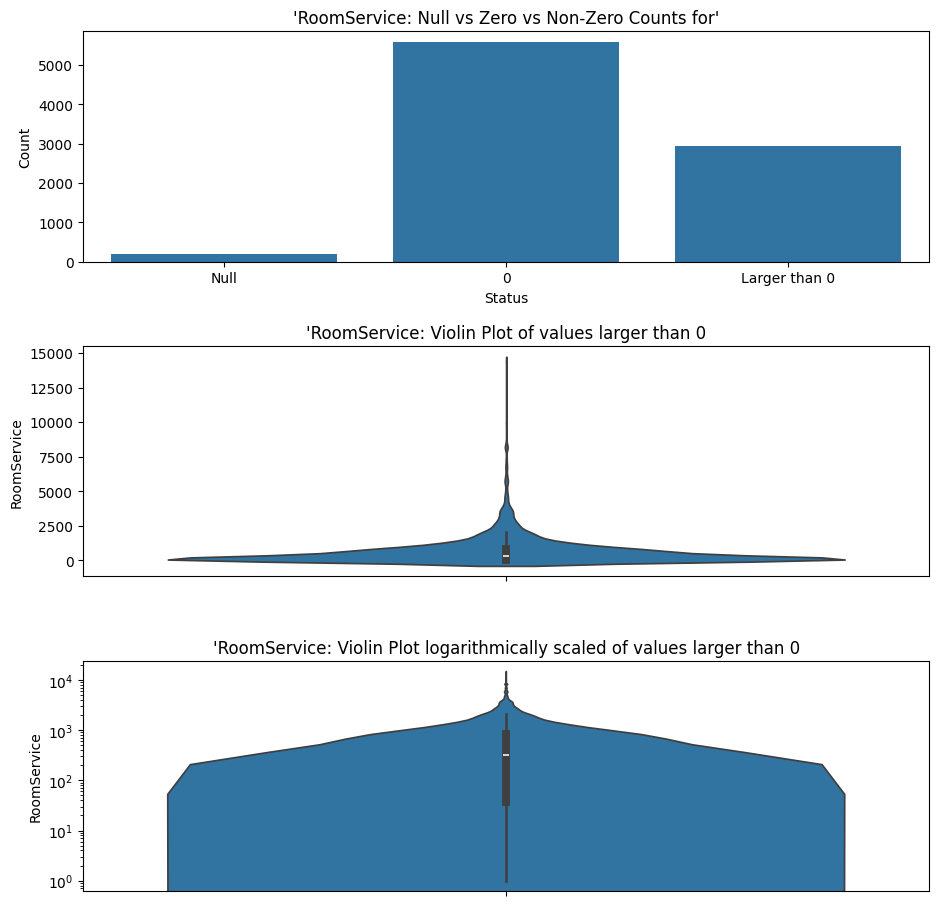

In [63]:
show_money_data_distribution('RoomService')

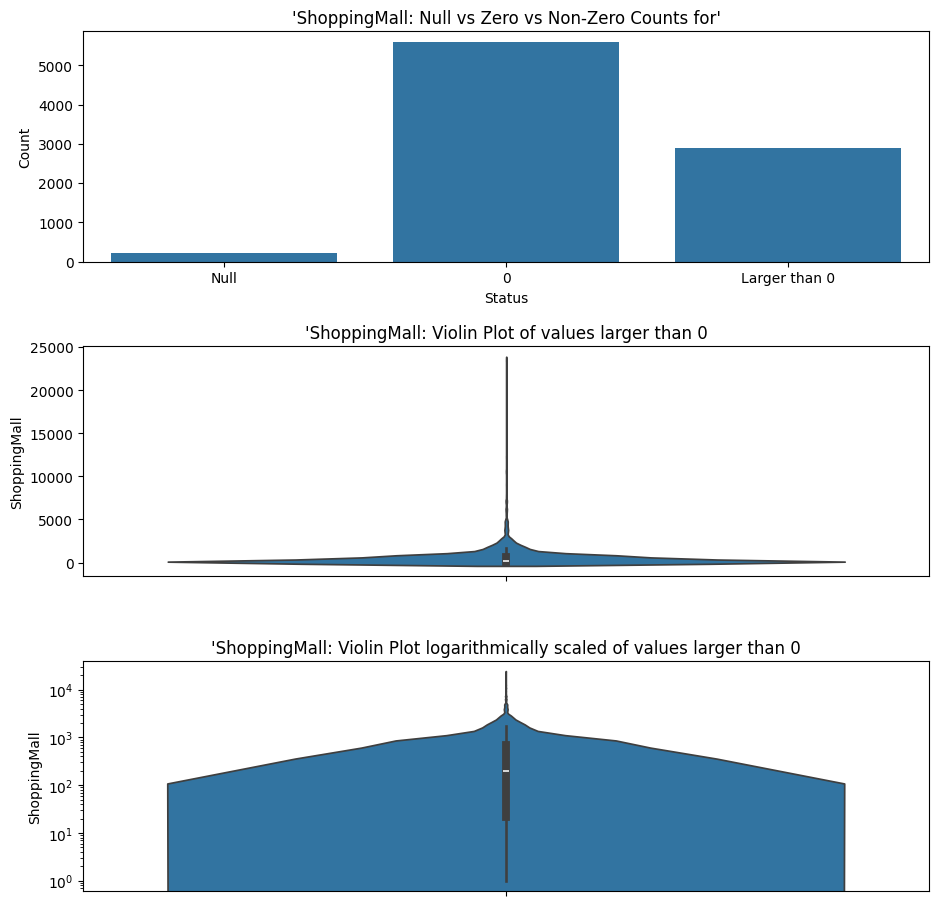

In [64]:
show_money_data_distribution('ShoppingMall')

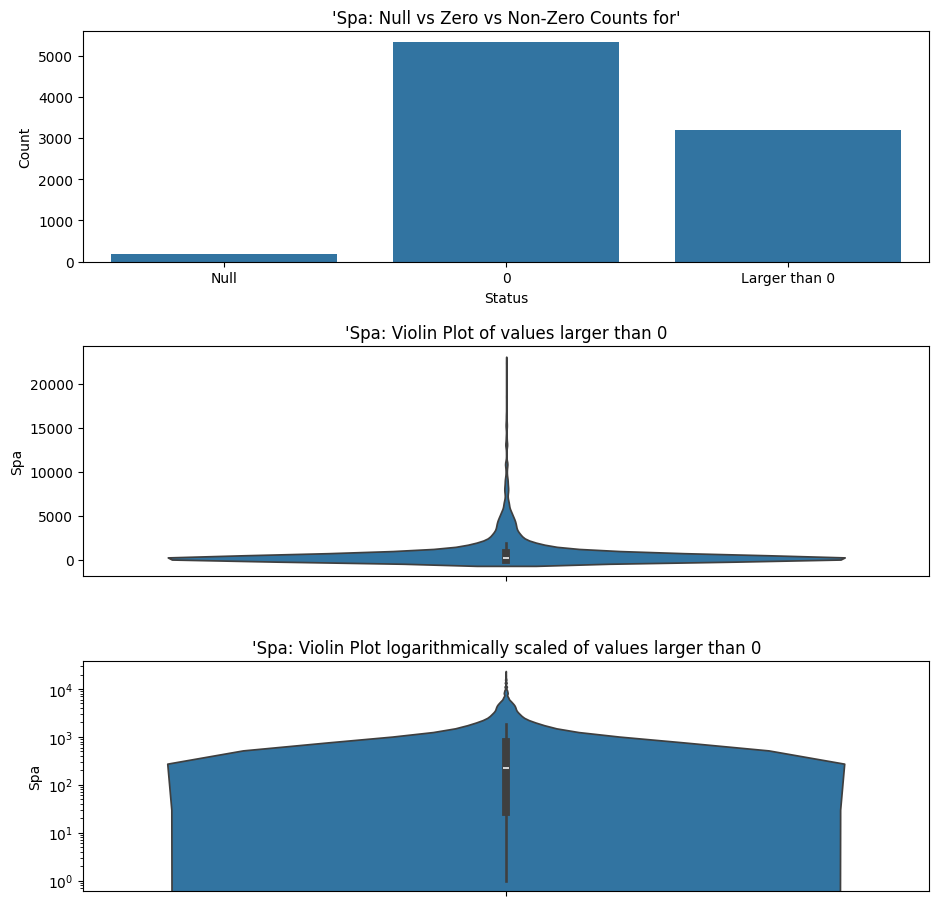

In [65]:
show_money_data_distribution('Spa')

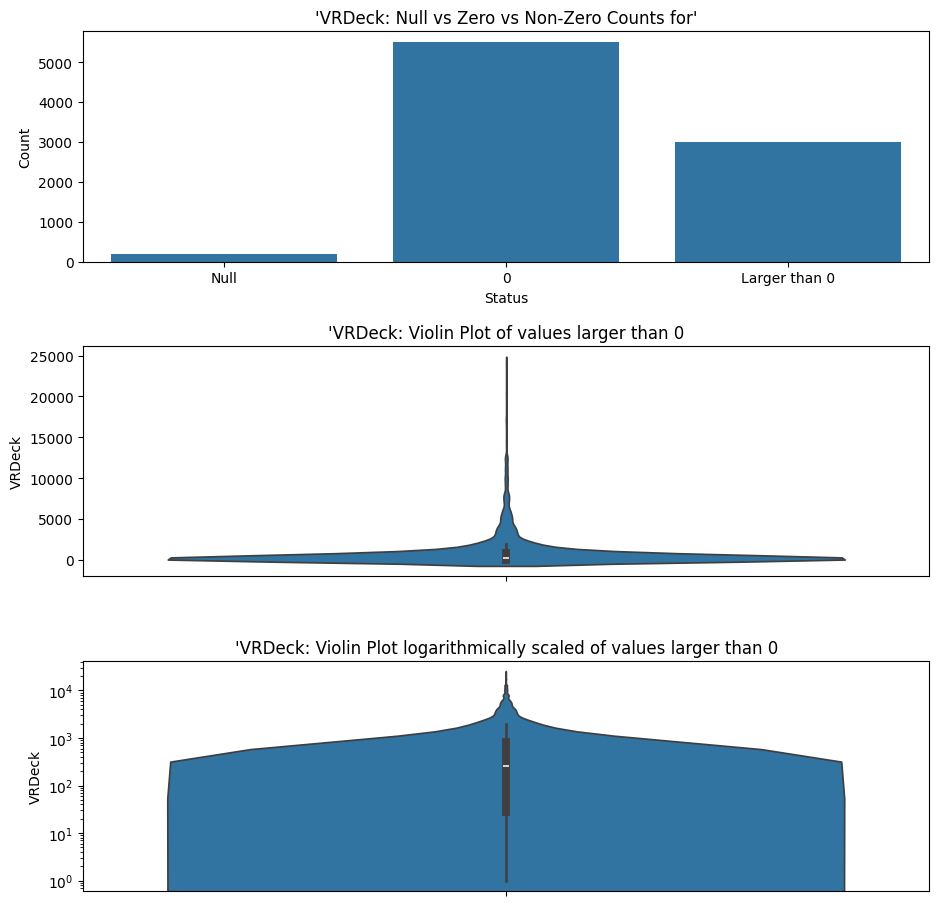

In [66]:
show_money_data_distribution('VRDeck')

In [67]:
print(discrete_vars)

{'Age'}


Vizualization of age values, in 3 different ways for bins. Auto, bins as decadeds

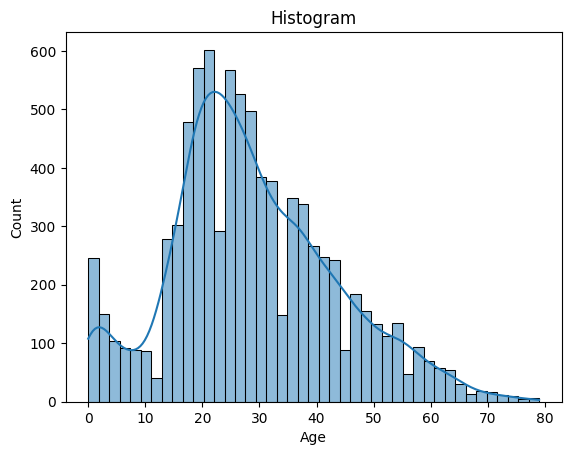

In [68]:
plt.figure()
sns.histplot(df['Age'], bins='auto', kde=True)
plt.title("Histogram")
plt.show()

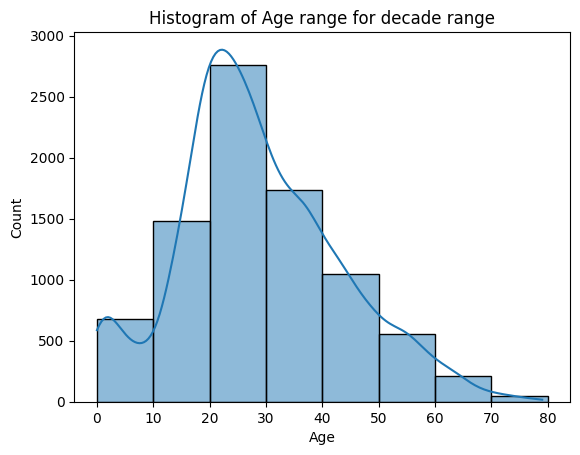

In [69]:
plt.figure()
sns.histplot(df['Age'], bins=list(range(0, 81, 10)), kde=True)
plt.title("Histogram of Age range for decade range")
plt.show()

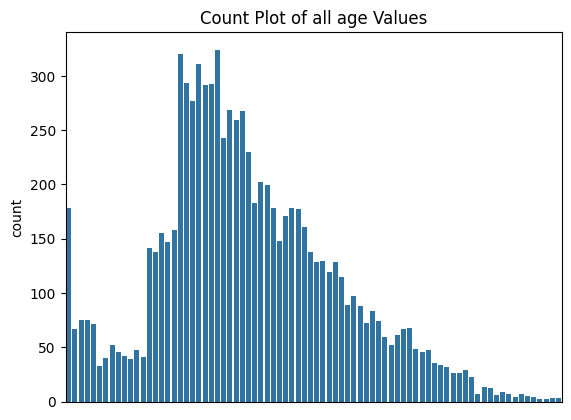

In [70]:
plt.figure()
sns.countplot(data=df, x='Age')
plt.title("Count Plot of all age Values")
plt.gca().xaxis.set_visible(False)
plt.show()


In [71]:
cat_nominal_vars

{'CabinDeck',
 'CabinSide',
 'CryoSleep',
 'Destination',
 'GroupMember',
 'HomePlanet',
 'VIP'}

Plot categorical nominal values.

In [72]:
def plot_categorical_data_counts(df, col):
  plot_data = df[col].fillna('NaN').astype(str) # Convert nan to string 'NaN' and ensure all are strings

  plt.figure(figsize=(10, 6))
  # Sort unique values, putting 'NaN' at the end if desired, or handle it differently
  # For alphabetical sort, filter out nan first, then add 'NaN' at the end
  sorted_decks = sorted([d for d in df[col].unique() if pd.notna(d)])
  if 'NaN' in plot_data.unique(): # Check if 'NaN' string exists after fillna
      sorted_decks.append('NaN') # Add 'NaN' as the last category

  sns.countplot(x=plot_data, order=sorted_decks)
  plt.title(f"{col} count plot")
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  plt.show()

Two cabin decks take majority of the data, while one cabin deck almost is not present.

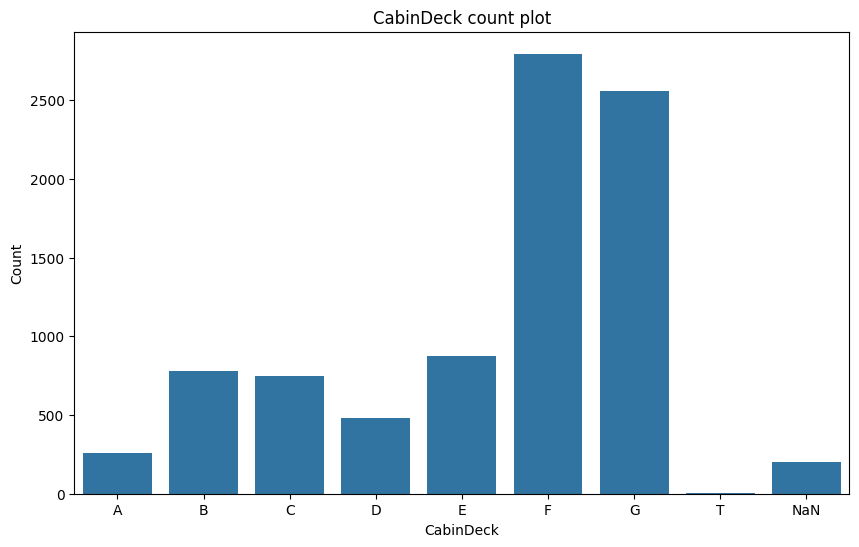

In [73]:
plot_categorical_data_counts(df, 'CabinDeck')

Cabin sides are rougly equaly distributed.

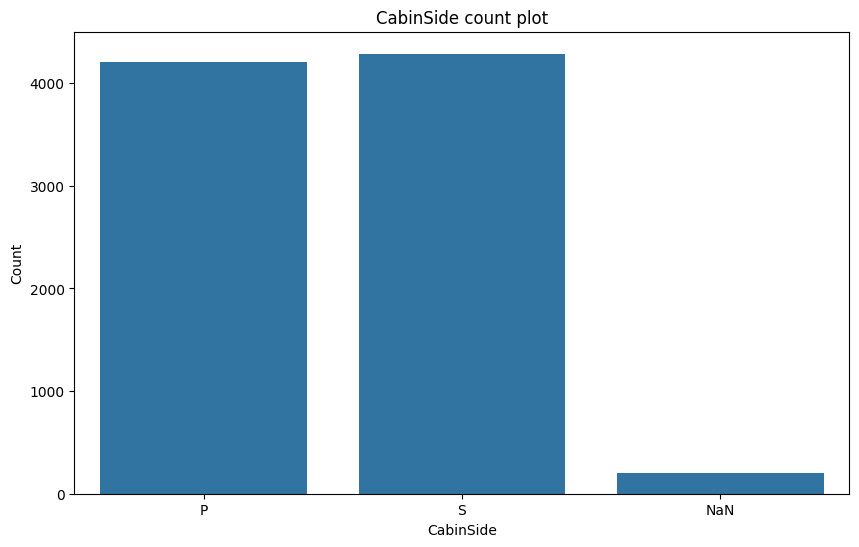

In [74]:
plot_categorical_data_counts(df, 'CabinSide')

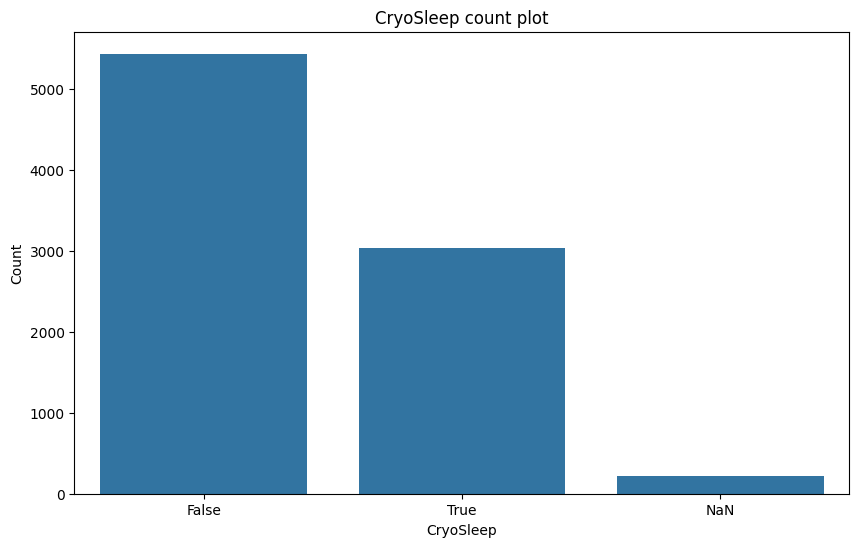

In [75]:
plot_categorical_data_counts(df, 'CryoSleep')

One destination is much more common that the others.

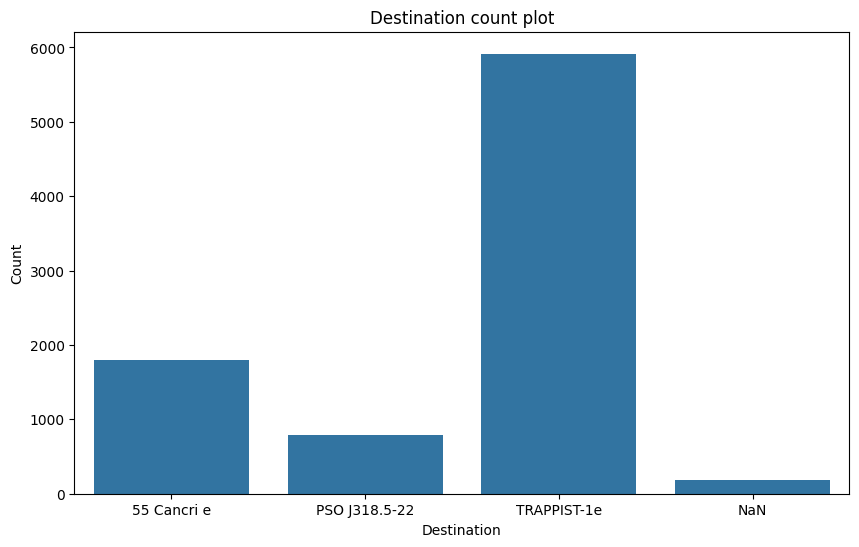

In [76]:
plot_categorical_data_counts(df, 'Destination')

There are no null values in group member because passenger is always present. It appears that most people traveled in groups of:
* 1 -> solo,
* 2 -> probably as a couple,
* 3 or more -> family


For each group id, we should parse out group memebers,
then do analysis based on group size(1, 2, 3 or more)
and we should then check ages in this group.

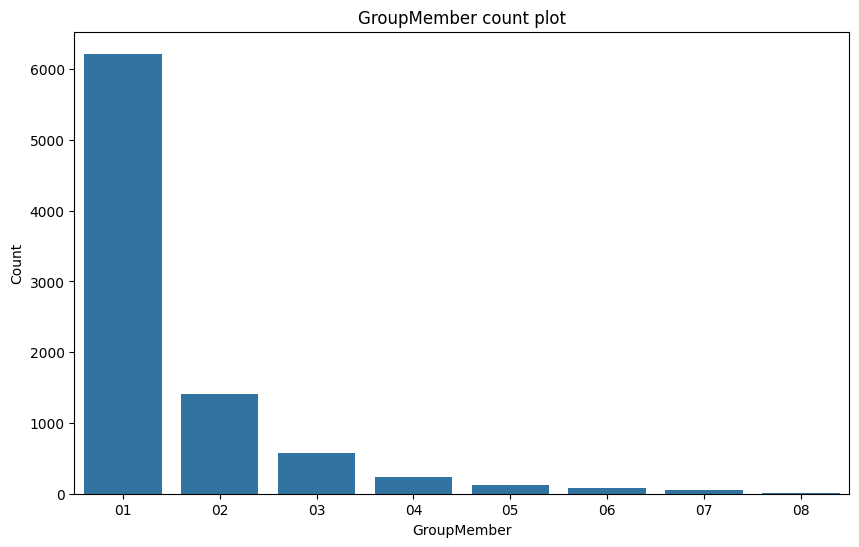

In [77]:
plot_categorical_data_counts(df, 'GroupMember')

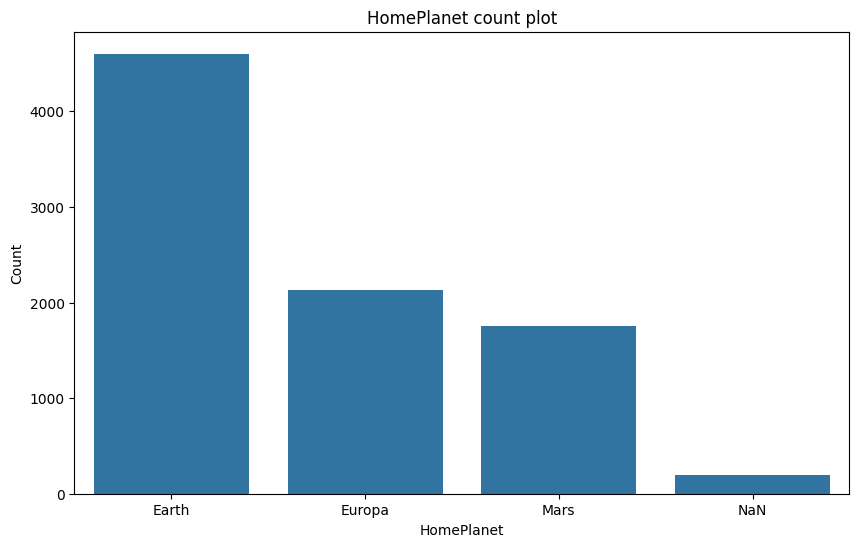

In [78]:
plot_categorical_data_counts(df, 'HomePlanet')

Vip is inbalanced most people are not VIP, so imputing missing with False could also make sense.

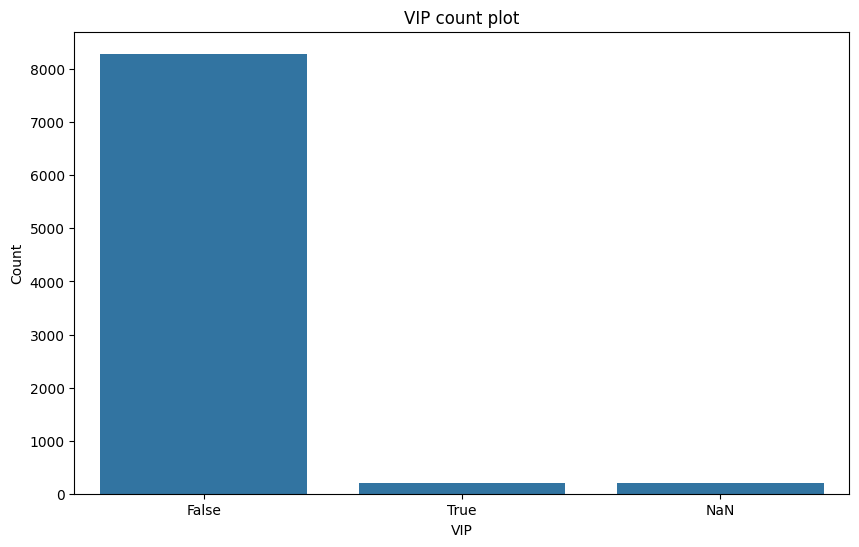

In [79]:
plot_categorical_data_counts(df, 'VIP')

**4.) Identify Significant Correlations**

These are mentioned in y-data report as having High Correlation:

- CabinDeck is highly overall correlated with HomePlanet
- CabinNum is highly overall correlated with PassengerGroup
- CabinSide is highly overall correlated with PassengerGroup
- FoodCourt is highly overall correlated with VRDeck
- HomePlanet is highly overall correlated with CabinDeck, PassengerGroup
- PassengerGroup is highly overall correlated with CabinNum, CabinSide and HomePlanet
- VRDeck is highly overall correlated with FoodCourt

Bellow is a heatmap picture of correlations created by y-data report:



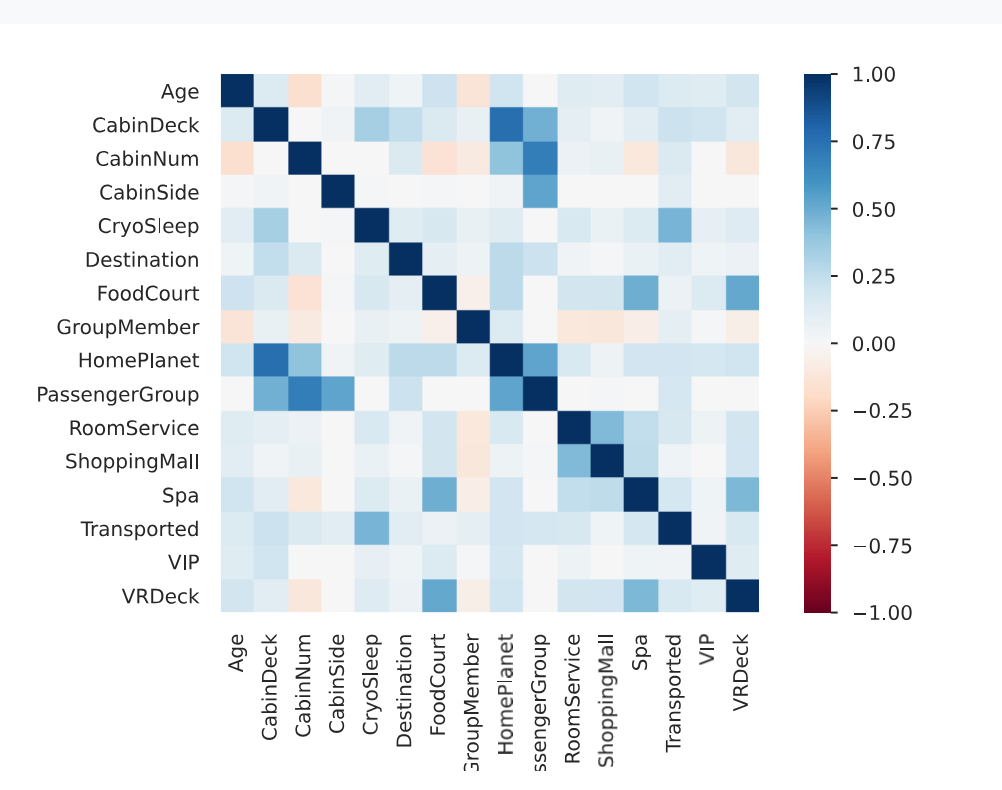

In [80]:
def plot_catgorical_correlations(col1, col2, column_order = None):
  # Create contingency table
  ct = pd.crosstab(df[col1], df[col2])

  if column_order is not None:
    ct = ct.reindex(columns=column_order)


  # Plot heatmap
  plt.figure(figsize=(8, 8))
  sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
  plt.title("Frequency of Category Combinations")
  plt.xlabel(col2)
  plt.ylabel(col1)
  plt.show()


In [81]:
def plot_two_numerical_values(df, col1, col2):
  plt.figure()
  sns.scatterplot(data=df, x=col1, y=col2)
  plt.title(f"Scatterplot of {col1} vs {col2}")
  plt.show()

Actual unique pairs from mapping with calculated correlation values, with some other higher correlations, that will be checked.

There are no significat negative correlation, so smaller than -0.3.


- CabinDeck – HomePlanet

  **0.753**
- CabinNum – PassengerGroup

  **0.691**
- CabinSide – PassengerGroup

  **0.529**
- HomePlanet – PassengerGroup

  **0.530**
- FoodCourt – VRDeck

  **0.511**
- Spa – VRDeck

  **0.448**
- RoomService – ShoppingMall

  **0.443**

- CabinDeck – PassengerGroup

  **0.478**
- FoodCourt – Spa

  **0.486**
- CryoSleep – Transported

  **0.468**

**A.) Cabin Deck and Home Planet**

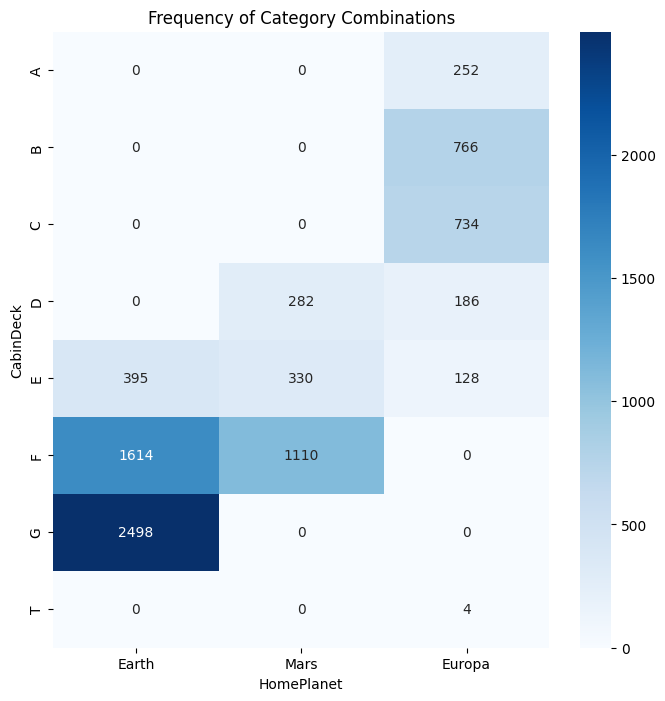

In [82]:
plot_catgorical_correlations('CabinDeck', 'HomePlanet', column_order=['Earth', 'Mars', 'Europa'])

Data is ordered based on planet order from the sun. We can definetely see see that cabins were populated somewhat sequentially, as different planets had to be visited for boarding.

Both FoodCourt and VRDeck are numeric values that represent luxury spending.

We see that they are somehat correlated positively,
since for many luxury spending is 0,
so many that spend something on luxury, spend something for multiple luxuries.



**B.) Luxury goods vizualization**

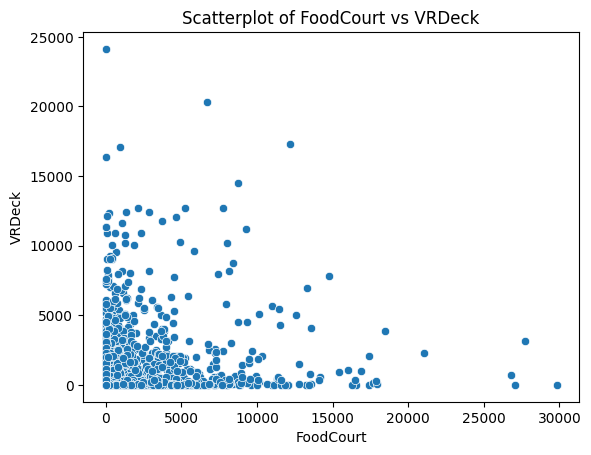

In [83]:
plot_two_numerical_values(df, 'FoodCourt', 'VRDeck')

Similar vizualization for couple of other luxury values with slightly smaller correlation.

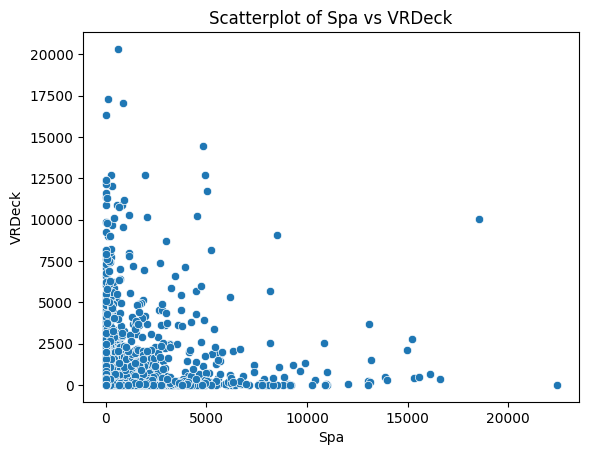

In [84]:
plot_two_numerical_values(df, 'Spa', 'VRDeck')

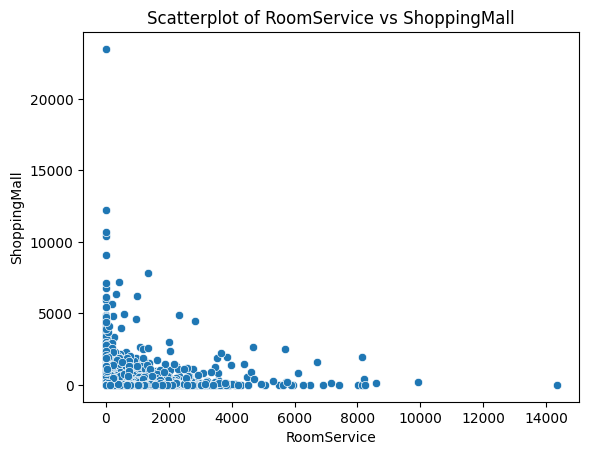

In [85]:
plot_two_numerical_values(df, 'RoomService', 'ShoppingMall')

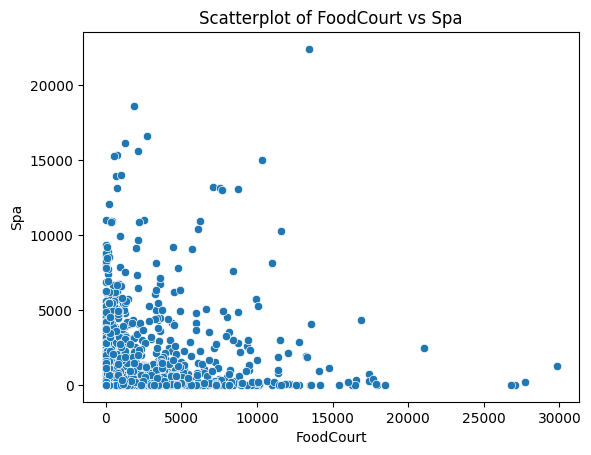

In [86]:
plot_two_numerical_values(df, 'FoodCourt', 'Spa')

Conclusion from this is that it would really make sense to combine luxury values.

They are often somewhat positively correlated, but outliers may also happen that will reduce this correlation number.

**C.) PassengerGroup vizualizations**

In [87]:
temp_df = pd.DataFrame({
    "PassengerGroup": pd.to_numeric(df["PassengerGroup"], errors="coerce")
                               .fillna(0)
                               .astype(np.int64),
    "CabinNum": pd.to_numeric(df["CabinNum"], errors="coerce")
                               .fillna(0)
                               .astype(np.int64),
})

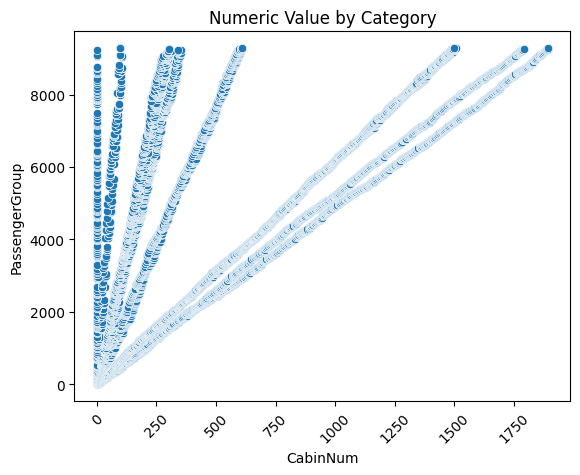

In [88]:
plt.figure()
sns.scatterplot(data=temp_df, x='CabinNum', y='PassengerGroup')
plt.xticks(rotation=45)
plt.title("Numeric Value by Category")
plt.show()

This was second most correlated value. While there appears to be some rule how cabin numbers were allocated based on passenger group, there appears no sensible rule.

In [89]:
temp_df[['PassengerGroup', 'CabinNum']].value_counts().head(10)

,,count
PassengerGroup,CabinNum,
4498,734,8
571,21,7
3850,137,7
5927,201,7
5814,176,7
221,13,7
714,109,7
378,11,7
5756,1194,7


Other vizualizations with PassengerGroup do not provide any meaningfull relationship seen visualy.

In [90]:
temp_df = pd.DataFrame({
    "PassengerGroup": pd.to_numeric(df["PassengerGroup"], errors="coerce")
                               .fillna(0)
                               .astype(np.int64),
    "CabinSide": df["CabinSide"],
    "HomePlanet": df["HomePlanet"],
    "CabinDeck": df["CabinDeck"],
})

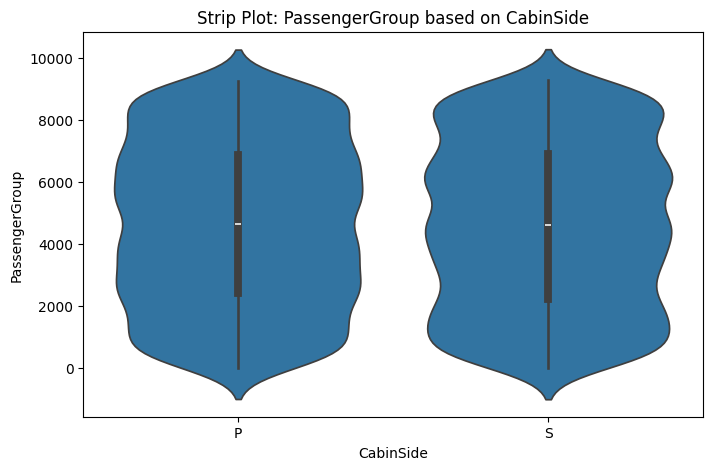

In [91]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="CabinSide", y="PassengerGroup", data=temp_df)
plt.title("Strip Plot: PassengerGroup based on CabinSide")
plt.show()

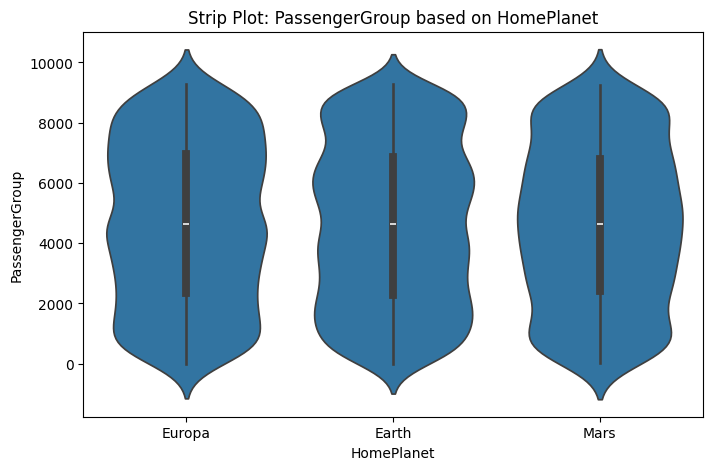

In [92]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="HomePlanet", y="PassengerGroup", data=temp_df)
plt.title("Strip Plot: PassengerGroup based on HomePlanet")
plt.show()

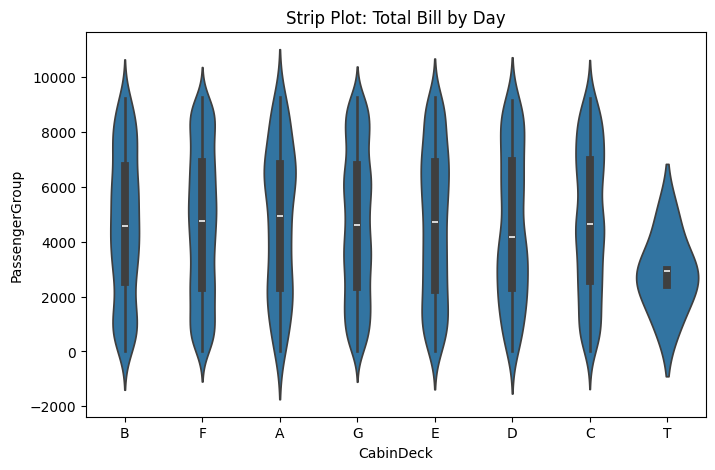

In [93]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="CabinDeck", y="PassengerGroup", data=temp_df)
plt.title("Strip Plot: Total Bill by Day")
plt.show()

**D.) Correlations with target value**

CryoSleep seems to be only variable directly correlated with Transported.

In [94]:
temp_df = pd.DataFrame({
    "CryoSleep": df["CryoSleep"].fillna('Null'),
    "Transported": df["Transported"],
})

In [95]:
temp_df

,CryoSleep,Transported
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
8688,False,False
8689,True,False
8690,False,True
8691,False,False


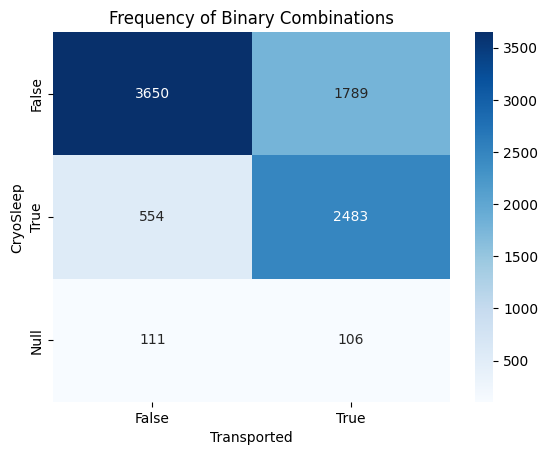

In [96]:
ct = pd.crosstab(temp_df['CryoSleep'], temp_df['Transported'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Transported")
plt.ylabel("CryoSleep")
plt.title("Frequency of Binary Combinations")
plt.show()


Yes there seems to be correlation, mainly if you werent in CryoSleep you will likely not be Transported.

Transported is split rougly 50% / 50%, CryoSleep is a bit over 1/3 is True.

In [97]:
df['CryoSleep'].unique(), df['CryoSleep'].value_counts()

(array([False, True, nan], dtype=object),
 CryoSleep
 False    5439
 True     3037
 Name: count, dtype: int64)

In [98]:
df['Transported'].unique(), df['Transported'].value_counts()

(array([False,  True]),
 Transported
 True     4378
 False    4315
 Name: count, dtype: int64)

Calculation of feature importance with Chi‑Square Test of Independence


In [99]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(temp_df['CryoSleep'], temp_df['Transported'])

chi2, p, dof, expected = chi2_contingency(ct)


print(f"Chi-square: {chi2}")
print(f"p-value: {p}")
print(f"degrees of freedom: {dof}")

Chi-square: 1861.7491156009698
p-value: 0.0
degrees of freedom: 2


Based on obtained p-value from test, there does seem to be correlation.

**5.) Spot Outliers in the Dataset**

**A.) All luxury goods variables have very large outliers, in terms of money spent.**


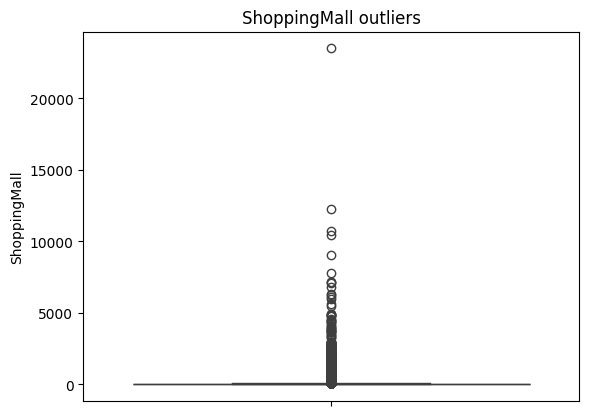

In [100]:
plt.figure()
sns.boxplot(y="ShoppingMall", data=df)
plt.title("ShoppingMall outliers")
plt.show()

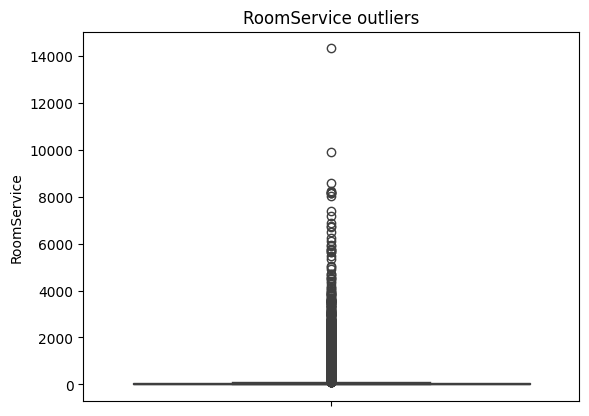

In [101]:
plt.figure()
sns.boxplot(y="RoomService", data=df)
plt.title("RoomService outliers")
plt.show()

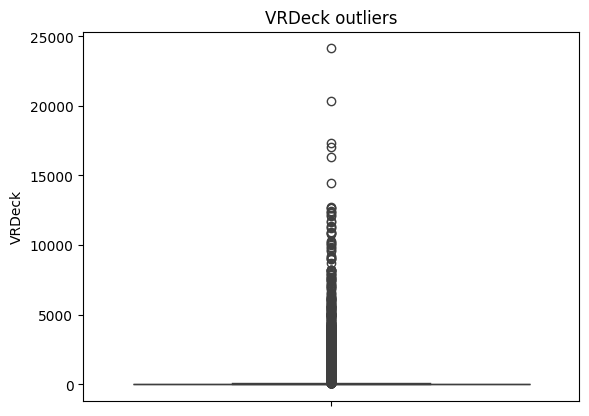

In [102]:
plt.figure()
sns.boxplot(y="VRDeck", data=df)
plt.title("VRDeck outliers")
plt.show()

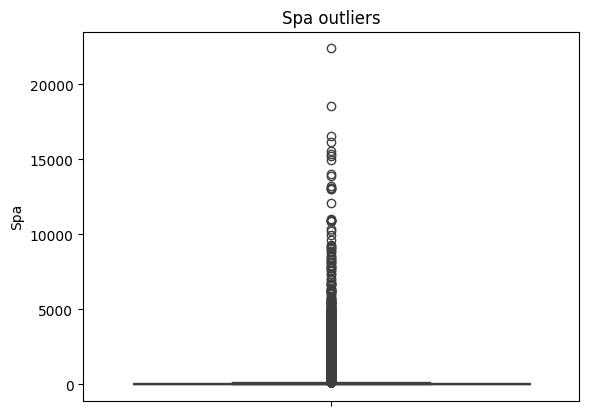

In [103]:
plt.figure()
sns.boxplot(y="Spa", data=df)
plt.title("Spa outliers")
plt.show()

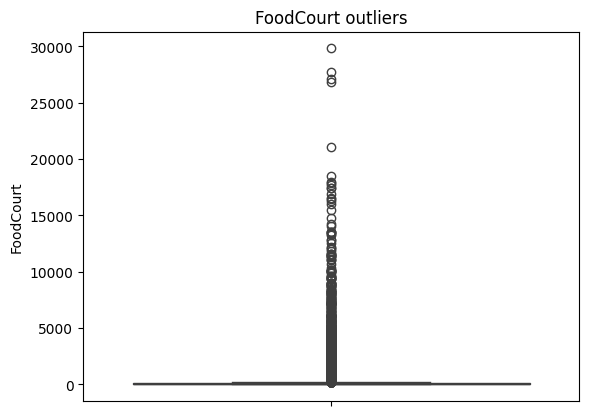

In [104]:
plt.figure()
sns.boxplot(y="FoodCourt", data=df)
plt.title("FoodCourt outliers")
plt.show()

**B.) VIP is higly imbalanced.**

Only 2.3% of total values are True.

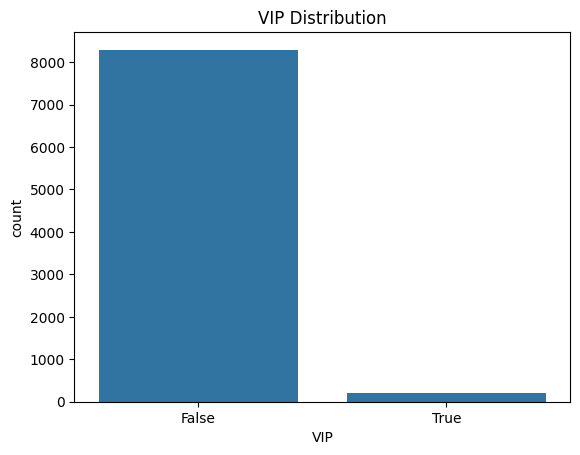

In [105]:
plt.figure()
sns.countplot(x="VIP", data=df)
plt.title("VIP Distribution")
plt.show()

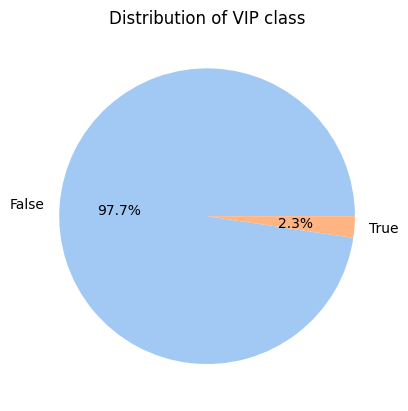

In [106]:
temp_counts = df['VIP'].value_counts()

colors = sns.color_palette("pastel")

plt.figure()
plt.pie(
    temp_counts.values,
    labels=temp_counts.index,
    autopct="%.1f%%",
    colors=colors
)

plt.title("Distribution of VIP class")
plt.show()